   # RED WINE QUALITY PREDICTION

 In this project, we will explore and analyze a dataset containing information about red wine properties and quality ratings. 

##  Problem Statement
#### 1. Develop a predictive model using machine learning algorithms to accurately assess and predict the quality of red wines based on various chemical properties and attributes.
#### 2. Evaluate and compare the performance of different machine learning techniques to determine the most effective approach for red wine quality prediction, providing insights for potential applications in the wine industry.

## Importing Libraries

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from warnings import filterwarnings
filterwarnings(action="ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading the dataset

In [238]:
df=pd.read_csv(r"C:\Users\Shreya Bharadwaj\Downloads\winequality-red.csv")

In [239]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Preprocessing

In [190]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [192]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [191]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

 It is used to count the occurrences of unique values in the "quality" column of a DataFrame named 'df'

#### Check the dimension

In [193]:
df.shape

(1599, 12)

There are total 1599 Records/Rows in the dataset.
There are total 12 Features/columns in the dataset

# 

In [194]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the features present is in the dataset is numerical.
No Categorical Features present in the dataset.

## Data Cleaning

#### Check for duplicate values

In [196]:
df.duplicated()   

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [197]:
df.duplicated().sum()

240

### Remove duplicate values

In [198]:
df.drop_duplicates(inplace=True)

In [199]:
df.duplicated()

0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Length: 1359, dtype: bool

### Finding Null Values

In [200]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [201]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

After removal of duplicate values, the number of rows have been reduced to 1359.

In [202]:
df.shape

(1359, 12)

In [203]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Checks how many unique values are present in each column

# 

# EDA : Exploratory data analysis

### Description

In [232]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The minimum wine quality is 3 and the maximum wine quality is 8.
The average alchol a red wine holds according to the data is 10.4.

In [205]:
df.groupby('quality').max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,11.6,1.580,0.66,5.7,0.267,34.0,49.0,1.00080,3.63,0.86,11.0
4,12.5,1.130,1.00,12.9,0.610,41.0,119.0,1.00100,3.90,2.00,13.1
5,15.9,1.330,0.79,15.5,0.611,68.0,155.0,1.00315,3.74,1.98,14.9
6,14.3,1.040,0.78,15.4,0.415,72.0,165.0,1.00369,4.01,1.95,14.0
7,15.6,0.915,0.76,8.9,0.358,54.0,289.0,1.00320,3.78,1.36,14.0
8,12.6,0.850,0.72,6.4,0.086,42.0,88.0,0.99880,3.72,1.10,14.0


The code df.groupby('quality').max() is used to group a DataFrame df by the "quality" column and then find the maximum value within each group for all other columns in the DataFrame.

In [206]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


The code df.groupby('quality').mean() is used to group a DataFrame df by the "quality" column and then find the mean value within each group for all other columns in the DataFrame.

In [207]:
columns_to_show = ["fixed acidity", "volatile acidity", "sulphates","alcohol"]
df.groupby(["alcohol"])[columns_to_show].describe(percentiles=[])

fixed acidity                                          \
                  count       mean       std   min    50%   max   
alcohol                                                           
8.400000            2.0  12.350000  2.757716  10.4  12.35  14.3   
8.500000            1.0  10.000000       NaN  10.0  10.00  10.0   
8.700000            2.0   8.050000  0.212132   7.9   8.05   8.2   
8.800000            1.0   9.900000       NaN   9.9   9.90   9.9   
9.000000           21.0   8.838095  1.896438   7.0   8.10  13.3   
...                 ...        ...       ...   ...    ...   ...   
13.500000           1.0   5.800000       NaN   5.8   5.80   5.8   
13.566667           1.0   5.300000       NaN   5.3   5.30   5.3   
13.600000           4.0   5.700000  1.140175   5.0   5.20   7.4   
14.000000           6.0   5.733333  1.517454   4.9   5.10   8.8   
14.900000           1.0  15.900000       NaN  15.9  15.90  15.9   

          volatile acidity                            ... sulphates        \
                     count      mean       std   min  ...       std   min   
alcohol                                               ...                   
8.400000               2.0  0.460000  0.212132  0.31  ...  0.113137  0.63   
8.500000               1.0  0.380000       NaN  0.38  ...       NaN  0.65   
8.700000               2.0  0.330000  0.127279  0.24  ...  0.084853  0.75   
8.800000               1.0  0.500000       NaN  0.50  ...       NaN  0.75   
9.000000              21.0  0.575714  0.177336  0.34  ...  0.147635  0.47   
...                    ...       ...       ...   ...  ...       ...   ...   
13.500000              1.0  0.290000       NaN  0.29  ...       NaN  0.54   
13.566667              1.0  0.470000       NaN  0.47  ...       NaN  0.88   
13.600000              4.0  0.412500  0.045735  0.36  ...  0.110567  0.66   
14.000000              6.0  0.418333  0.053821  0.34  ...  0.033116  0.74   
14.900000              1.0  0.360000       NaN  0.36  ...       NaN  0.84   

                       alcohol                                        \
             50%   max   count       mean  std        min        50%   
alcohol                                                                
8.400000   0.710  0.79     2.0   8.400000  0.0   8.400000   8.400000   
8.500000   0.650  0.65     1.0   8.500000  NaN   8.500000   8.500000   
8.700000   0.810  0.87     2.0   8.700000  0.0   8.700000   8.700000   
8.800000   0.750  0.75     1.0   8.800000  NaN   8.800000   8.800000   
9.000000   0.580  1.17    21.0   9.000000  0.0   9.000000   9.000000   
...          ...   ...     ...        ...  ...        ...        ...   
13.500000  0.540  0.54     1.0  13.500000  NaN  13.500000  13.500000   
13.566667  0.880  0.88     1.0  13.566667  NaN  13.566667  13.566667   
13.600000  0.805  0.88     4.0  13.600000  0.0  13.600000  13.600000   
14.000000  0.770  0.82     6.0  14.000000  0.0  14.000000  14.000000   
14.900000  0.840  0.84     1.0  14.900000  NaN  14.900000  14.900000   

                      
                 max  
alcohol               
8.400000    8.400000  
8.500000    8.500000  
8.700000    8.700000  
8.800000    8.800000  
9.000000    9.000000  
...              ...  
13.500000  13.500000  
13.566667  13.566667  
13.600000  13.600000  
14.000000  14.000000  
14.900000  14.900000  

[65 rows x 24 columns]

In [208]:
df.apply(np.max)

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

The code df.apply(np.max) is used to apply the np.max function (from the NumPy library) which finds the maximum value to each column of the DataFrame df.

In [209]:
df.apply(np.min)

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

The code df.apply(np.min) is used to apply the np.min function (from the NumPy library)which finds the minimum value to each column of the DataFrame df.

In [210]:
pd.crosstab(df["residual sugar"], df["alcohol"])

alcohol,8.400000,8.500000,8.700000,8.800000,9.000000,9.050000,9.100000,9.200000,9.233333,9.250000,...,13.000000,13.100000,13.200000,13.300000,13.400000,13.500000,13.566667,13.600000,14.000000,14.900000
residual sugar,,,,,,,,,,,,,,,,,,,,,
0.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1.4,0,0,0,0,0,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The code generates a cross-tabulation or contingency table that counts the occurrences of combinations of values between the "residual sugar" and "alcohol" columns in a DataFrame df. Each cell in the table represents the count of data points that have a specific combination of values for these two columns, allowing you to analyze their relationships and distributions.

# Data Visualization

### Count plot

<Figure size 200x300 with 0 Axes>

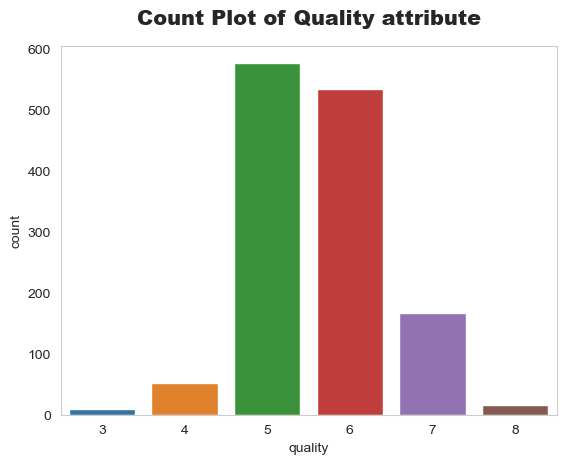

<Figure size 200x300 with 0 Axes>

In [211]:
sns.countplot(x='quality', data=df)
plt.title("Count Plot of Quality attribute", fontweight="black",size=15,pad=15)
plt.grid(False)
plt.figure(figsize=(2,3))

It generates a bar plot where the x-axis represents the unique values in the "quality" column of the DataFrame df, and the y-axis represents the count or frequency of each unique value.


### Scatter Plot

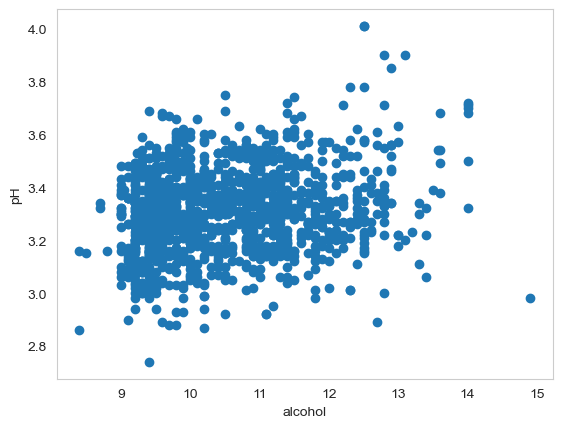

In [212]:
plt.scatter(df["alcohol"],df["pH"])
plt.xlabel("alcohol")
plt.ylabel("pH")
plt.grid(False)

This type of plot can help in exploring correlations or patterns between these two variables.

### Dist plot

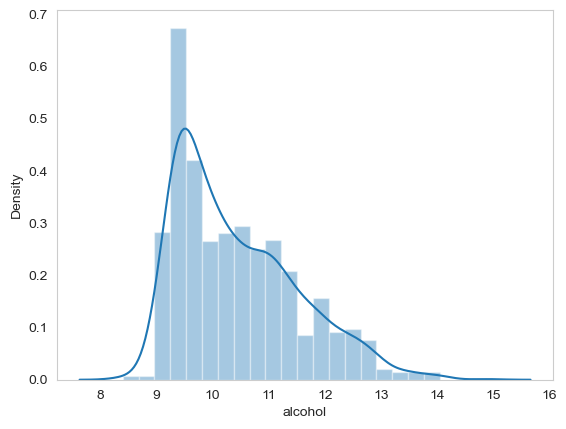

In [213]:
sns.distplot(df['alcohol'])
plt.grid(False)

It will generate a histogram that represents the distribution of alcohol content values in your dataset. Each bar in the histogram corresponds to a range of alcohol content values, and the height of each bar represents the frequency or density of data points falling within that range. This type of plot is commonly used to visualize the distribution of a continuous numerical variable and can provide insights into the central tendency and spread of the data.


### Histogram

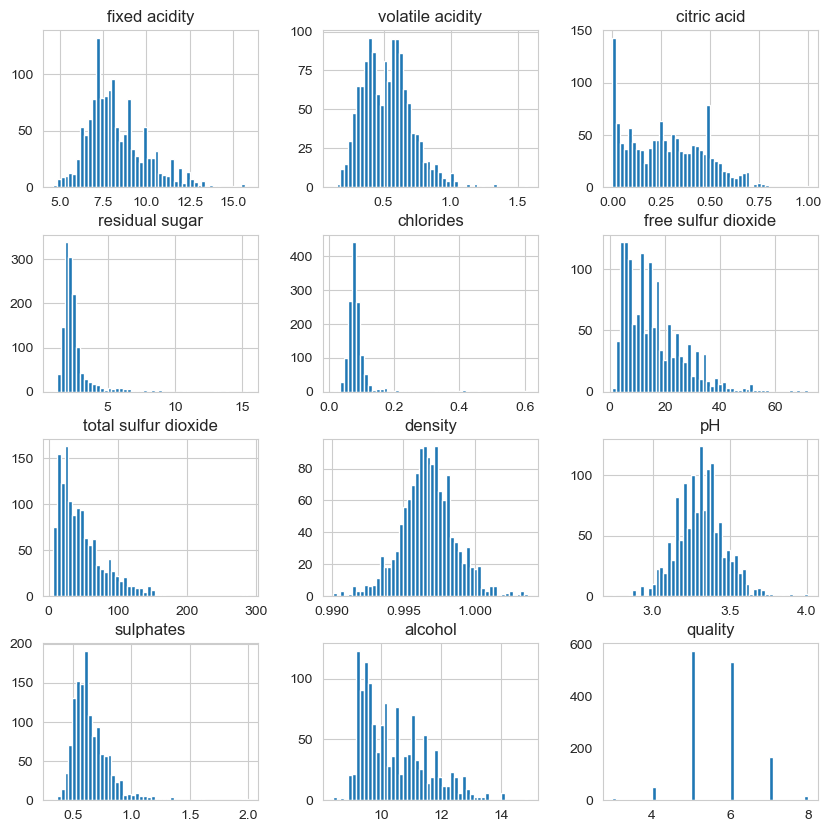

In [214]:
df.hist(figsize=(10,10),bins=50)
plt.grid(False)



It is a graph showing the number of observations within each given interval

## Visualizing Attributes

In [219]:
def numerical_plot(column):
    plt.figure(figsize=(13.5,10))
    plt.subplot(2,1,1)
    sns.boxplot(x="quality",y=column, data=df, palette=["#FFA07A","#D4A1E7","#FFC0CB","#87CEFA","#F08080","#D8BFD8"])
    plt.title(f"{column.title()} vs Quality Analysis",fontweight="black",size=25,pad=10,)

    plt.subplot(2,1,2)
    sns.histplot(x=column,kde=True,hue="quality",data=df, palette="Set2")
    skew = df[column].skew()
    plt.title(f"Skewness of {column.title()} Feature is: {round(skew,3)}",fontweight="black",size=20,pad=10)
    plt.tight_layout()
    plt.show()

## Visualizing "Fixed Acidity" Attribute. 

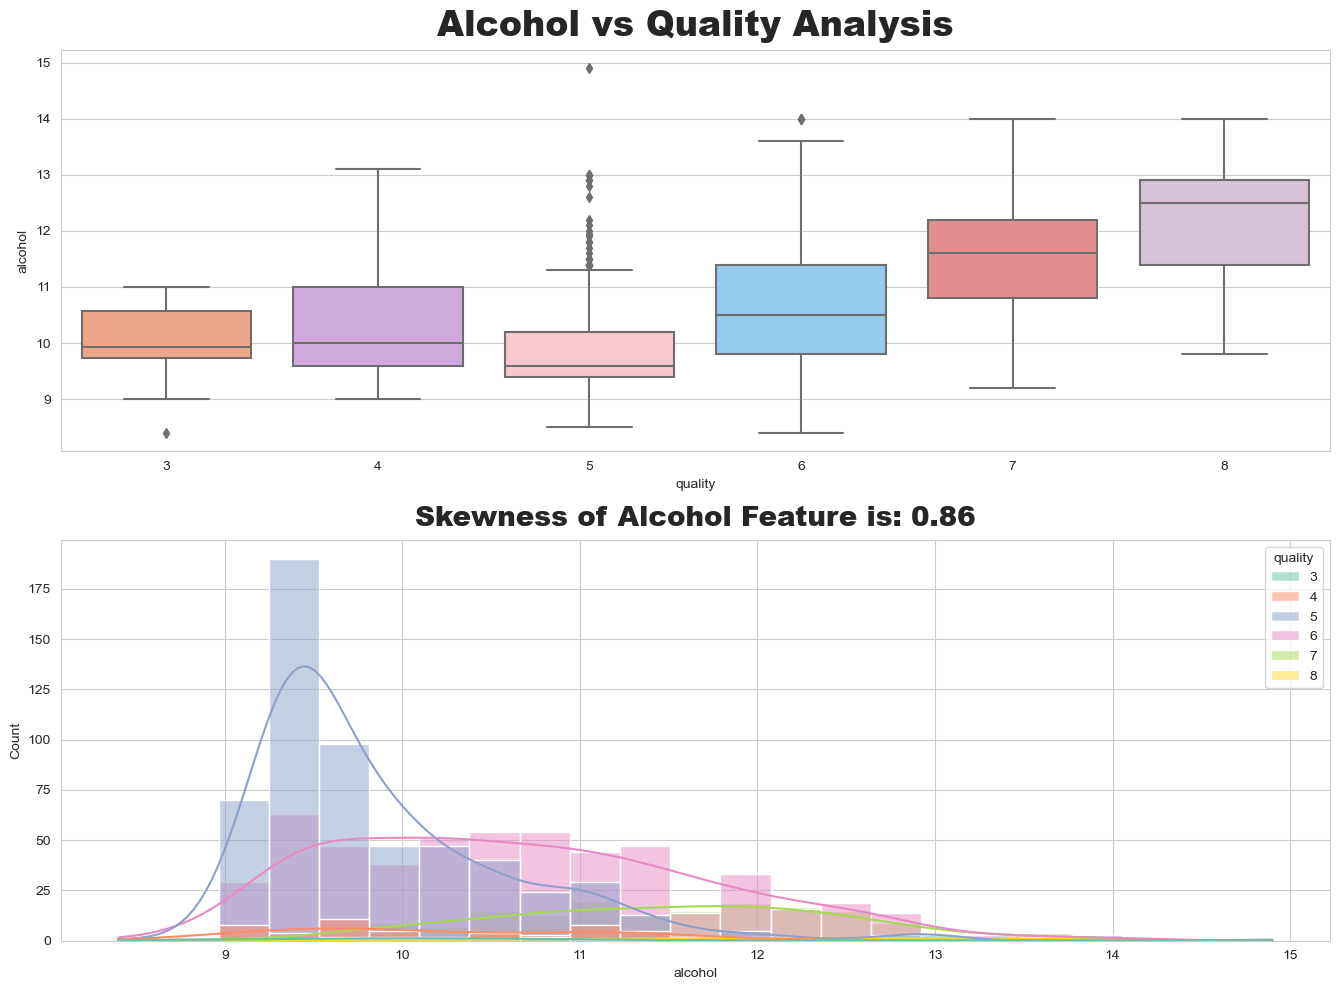

In [221]:
numerical_plot("alcohol")

The feature Alcohol is having Asymmetric Distribution and the distribution is highly right skewed with a skewness value of 0.86.
The distrbution is highly right skewed because of presence of outliers.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution and bring skewness close to 0.

## Visualizing "Citric Acid" Attribute.

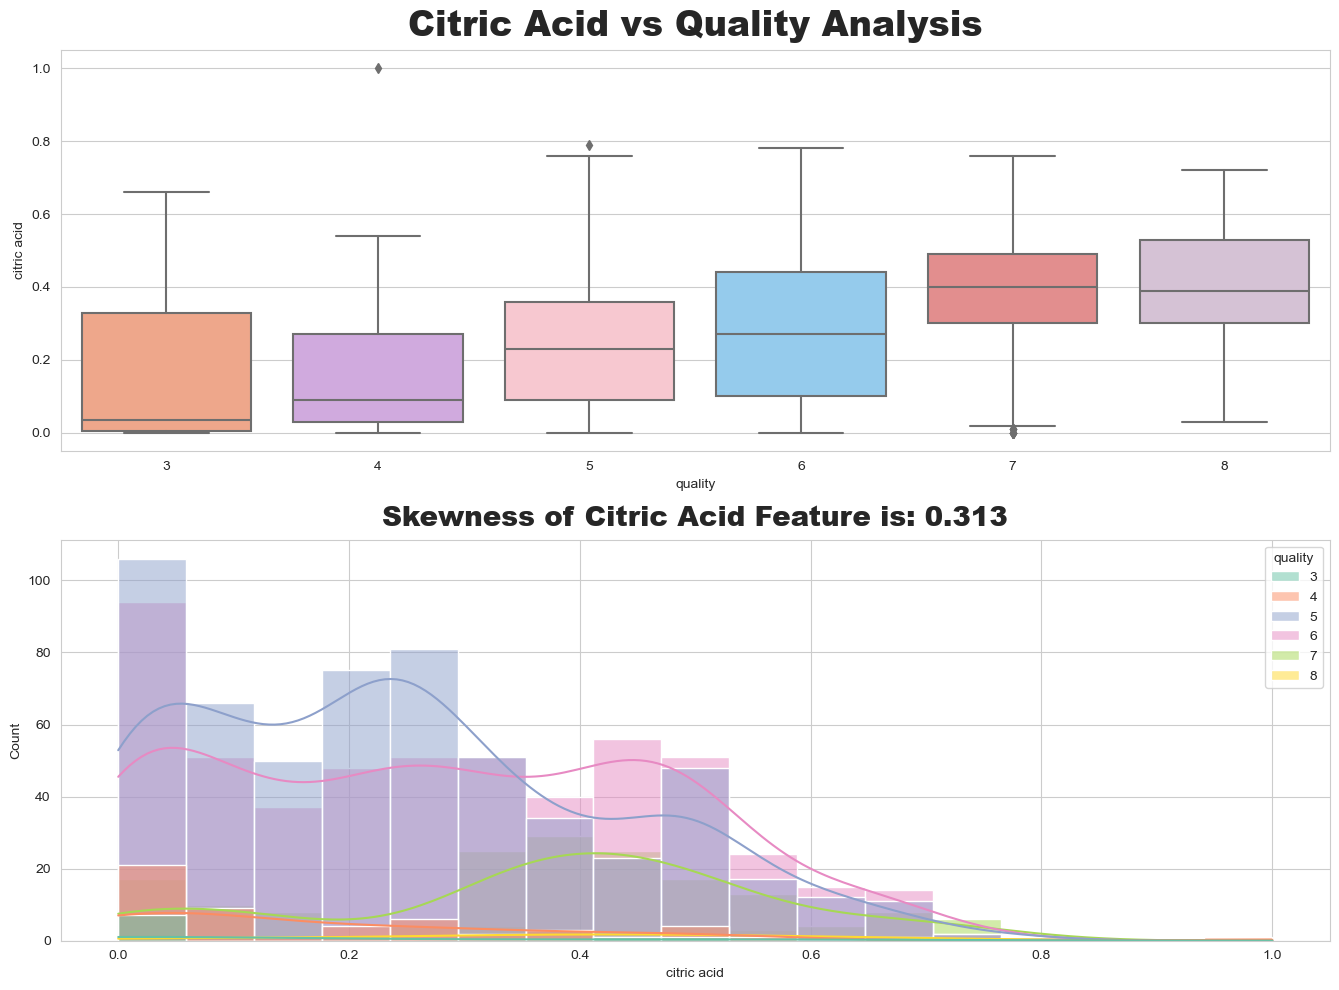

In [222]:
numerical_plot("citric acid")

The feature Citric Acid is having a distribution of right skewed with a skewness value of 0.313.
Although the skewness is low but still we try to bring the skewness close to 0.
So we will use tranformation techniques to transform thesse feature to have a symmetric distribution.

## Visualizing "Alcohol" Attribute.

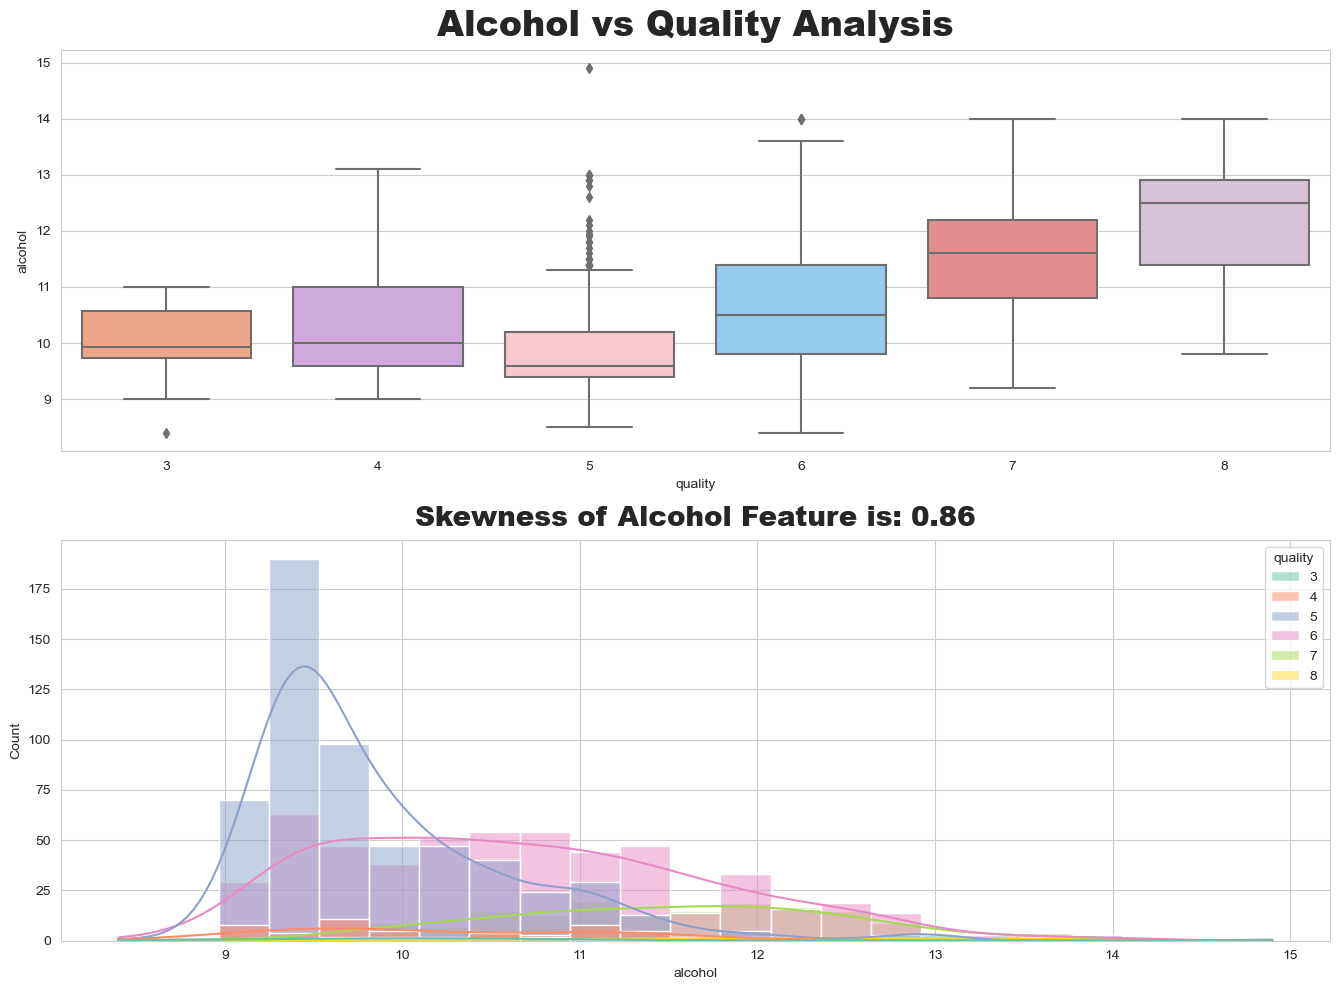

In [223]:
numerical_plot("alcohol")

he feature Alcohol is having Asymmetric Distribution and the distribution is highly right skewed with a skewness value of 0.86.
The distrbution is highly right skewed because of presence of outliers.

# 

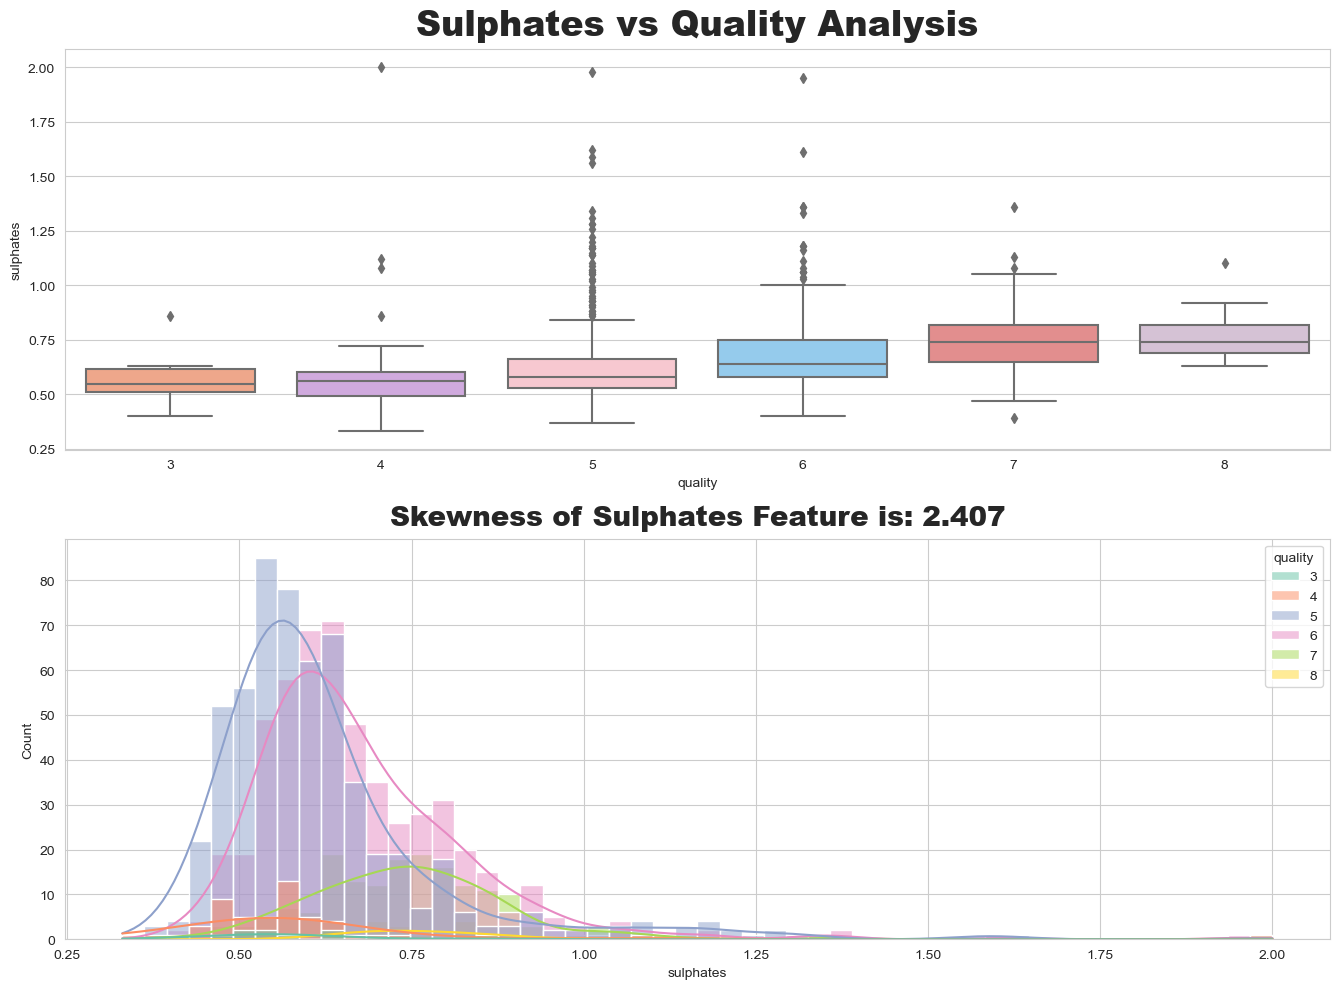

In [224]:
numerical_plot("sulphates")

The feature Sulphates is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 2.407.
The distrbution is highly right skewed because of presence of outliers.

## Visualizing "pH" Attribute.

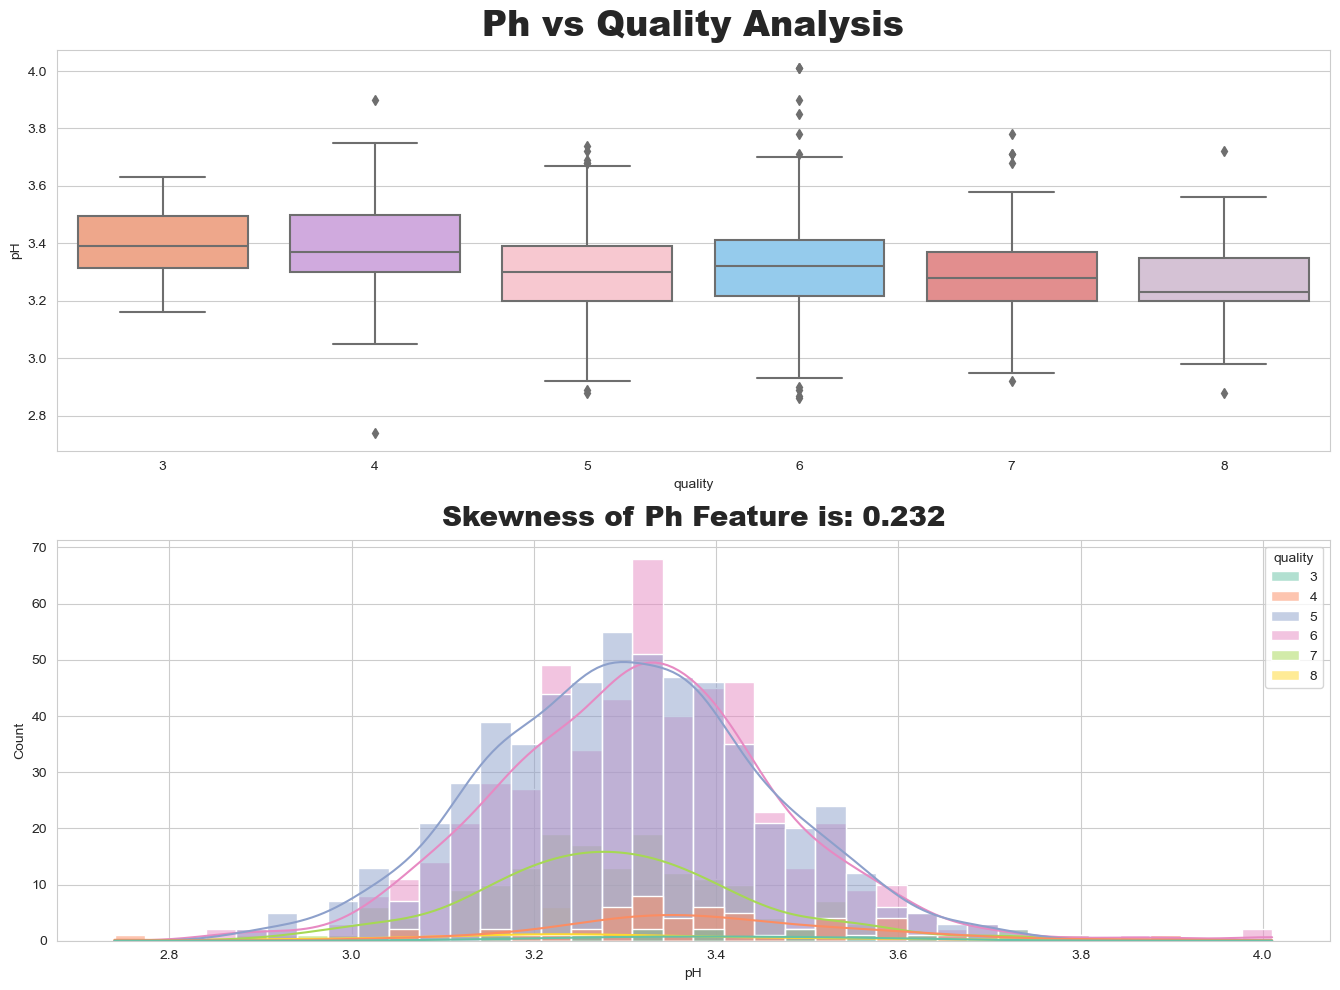

In [225]:
numerical_plot("pH")

The feature pH is having a Normal Distribution with a skewness value of 0.232..
But still the tails is little right skewed because of presence of outliers.

## Visualizing "Residual Sugar" Attribute.

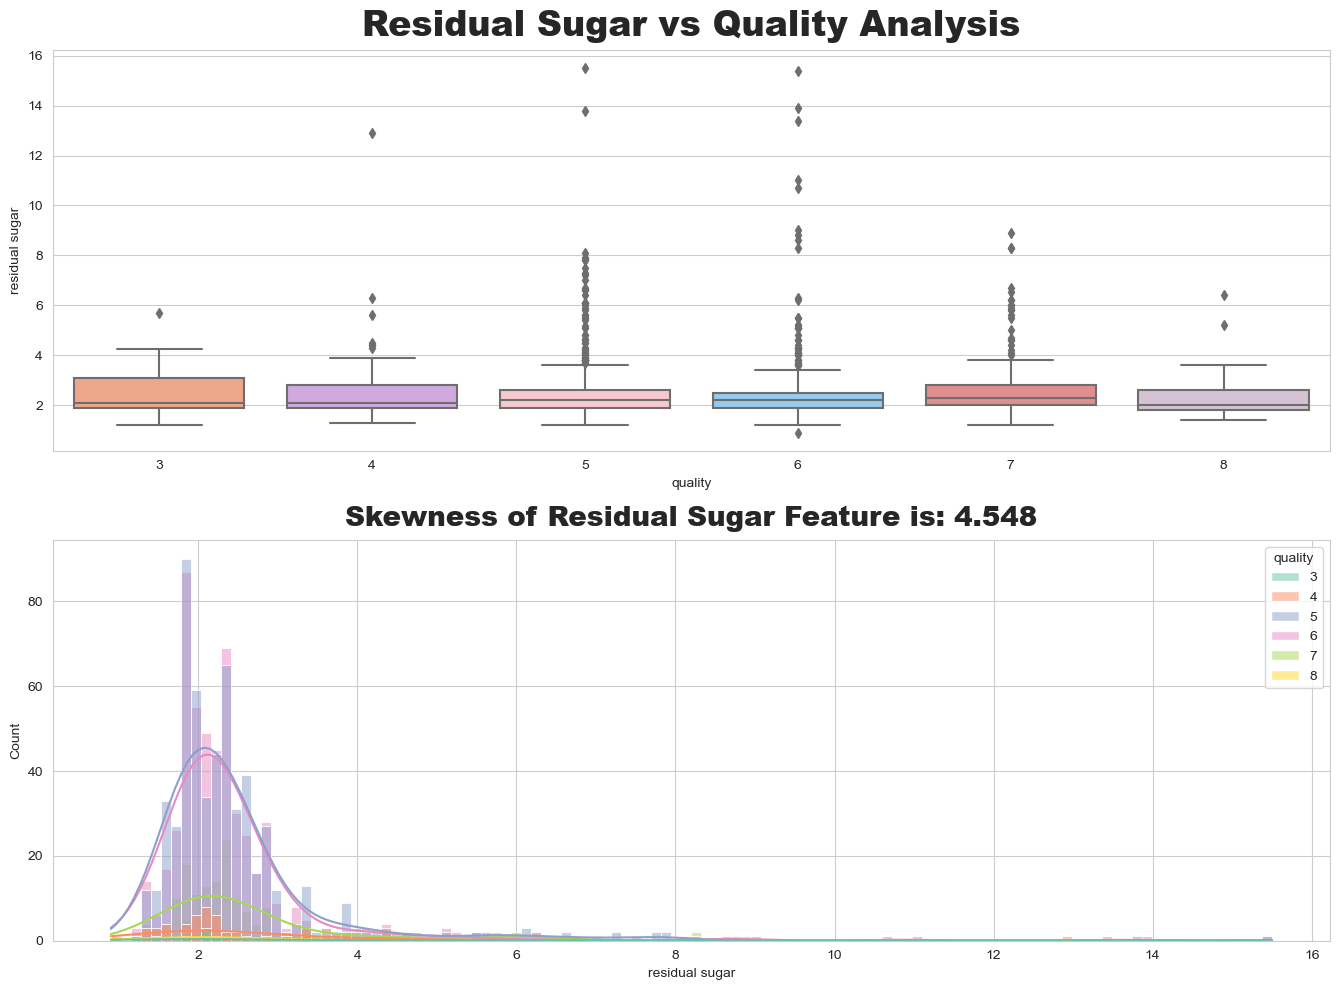

In [226]:
numerical_plot("residual sugar")

The feature Residual Sugar is having almost a symmetric distribution but the distribution is highly right skewed with a skewness value of 4.548.
The distrbution is highly right skewed because of presence of outliers.

## Correlation

In [236]:
corr=df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024,0.116120
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214,-0.267344
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057,0.203561
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640,0.052811
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988,-0.096806
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463,-0.072771
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855,-0.135877
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252,-0.158052
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245,-0.054131
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835,0.201551


The code df.corr() calculates and returns the correlation matrix for a DataFrame df. This correlation matrix provides a numerical representation of the linear relationships between pairs of columns in the DataFrame

# Heatmap for representing correlation

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. In the context of a correlation matrix, the heatmap visually represents the strength and direction of correlations between pairs of variables.

<Axes: >

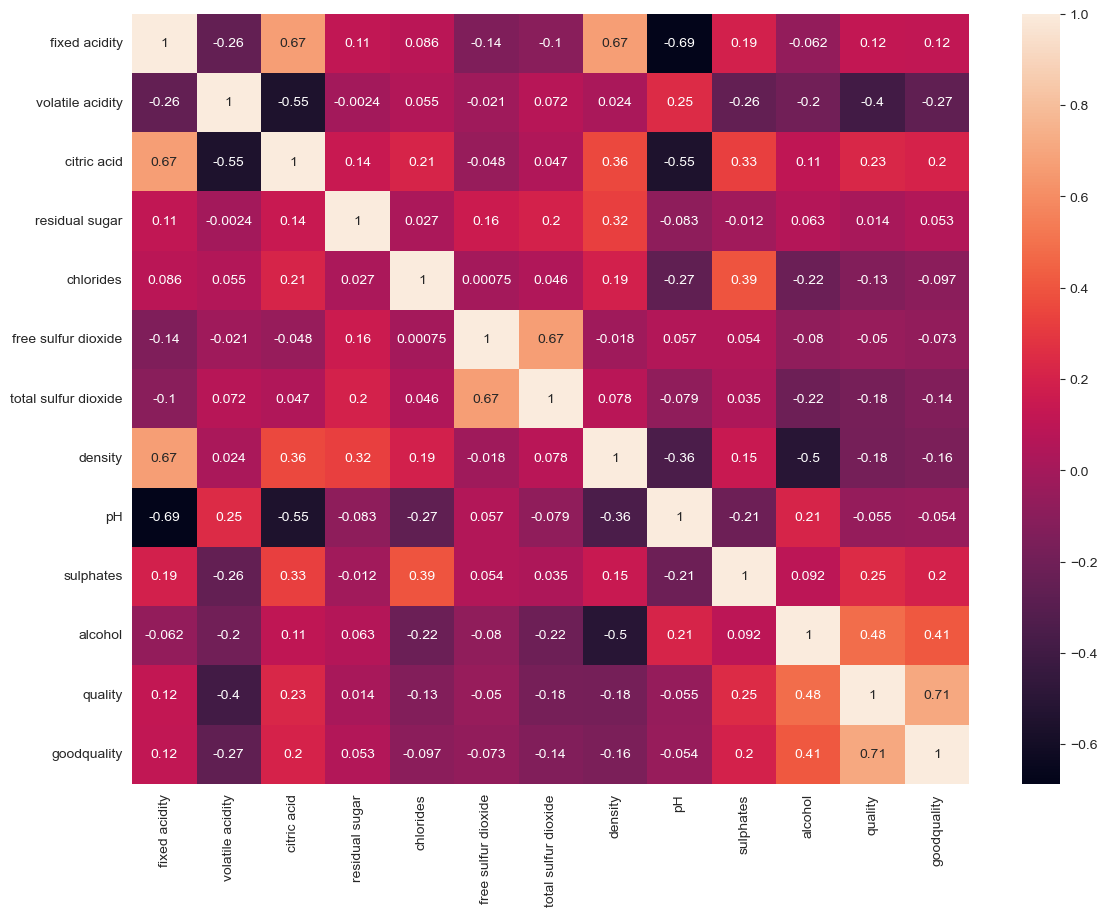

In [52]:
plt.figure(figsize=(13.5,10))
sns.heatmap(corr,annot=True)

Many features are having high correlation with the other features:-
Fixed Acidity is having high correlation with citic acid and density and vice-versa.
Volatile Acidity is having high correlation with pH and vice-versa.
Free Sulfur Dioxide is having high correlation with total sulfur dioxide, pH, Sulphates and vice-versa.
Density is having high correaltion with fixed acidity, alcohol and vice-versa.

# Seperating dependent and independent variables

In [234]:
# target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]  # Separate feature variables and target variable
X=df.drop(['quality','goodquality'], axis = 1)
Y=df['goodquality']

In [235]:
df['goodquality'].value_counts()

0    1175
1     184
Name: goodquality, dtype: int64

In [43]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [44]:
Y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: goodquality, Length: 1359, dtype: int64

## Feature Importance

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07967382 0.10268725 0.08760439 0.07438069 0.06876552 0.06961567
 0.08423319 0.08310166 0.06777761 0.11039631 0.1717639 ]


# Modelling

## Splitting the dataset

In [130]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=7)

In [131]:
Xtrain

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
768,7.1,0.590,0.02,2.3,0.082,24.0,94.0,0.99744,3.55,0.53,9.700000
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.700000
617,11.5,0.310,0.51,2.2,0.079,14.0,28.0,0.99820,3.03,0.93,9.800000
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.500000
1054,8.2,0.640,0.27,2.0,0.095,5.0,77.0,0.99747,3.13,0.62,9.100000
...,...,...,...,...,...,...,...,...,...,...,...
240,8.9,0.635,0.37,1.7,0.263,5.0,62.0,0.99710,3.00,1.09,9.300000
579,10.6,0.310,0.49,2.2,0.063,18.0,40.0,0.99760,3.14,0.51,9.800000
618,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.200000
1439,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667


In [132]:
Xtest

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
700,10.6,1.020,0.43,2.9,0.076,26.0,88.0,0.99840,3.08,0.57,10.1
1220,10.9,0.320,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5
1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2
...,...,...,...,...,...,...,...,...,...,...,...
1079,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3
309,7.4,0.290,0.38,1.7,0.062,9.0,30.0,0.99680,3.41,0.53,9.5
908,7.4,0.520,0.13,2.4,0.078,34.0,61.0,0.99528,3.43,0.59,10.8
1411,6.4,0.470,0.40,2.4,0.071,8.0,19.0,0.99630,3.56,0.73,10.6


In [133]:
Ytrain

768     0
77      0
617     0
1030    1
1054    0
       ..
240     0
579     0
618     0
1439    0
198     1
Name: goodquality, Length: 951, dtype: int64

In [134]:
Ytest

700     0
1220    0
1585    0
1027    0
15      0
       ..
1079    1
309     0
908     0
1411    0
188     0
Name: goodquality, Length: 408, dtype: int64

# MODEL BUILDING USING LOGISTIC REGRESSION

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(Xtrain,Ytrain)

LogisticRegression()

In [60]:
Y_pred = model.predict(Xtest)
f1 = f1_score(Ytest, Y_pred, average='weighted')
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Ytest,Y_pred))

Accuracy Score: 0.8872549019607843


In [61]:
print(f'F1 score is:',f1)

F1 score is: 0.8729967396794784


In [64]:
print("Recall Score is =>",recall_score(Ytest,Y_pred, average="weighted"))

Recall Score is => 0.8872549019607843


In [76]:
print("Precision Score is =>",precision_score(Ytest,y_pred, average="weighted"))

Precision Score is => 0.8443043884220355


In [241]:
confusion_mat = confusion_matrix(Ytest,Y_pred)
print(confusion_mat)                                       #[TP TN
                                                           #FP FN]

[[343  11]
 [ 35  19]]


<Axes: >

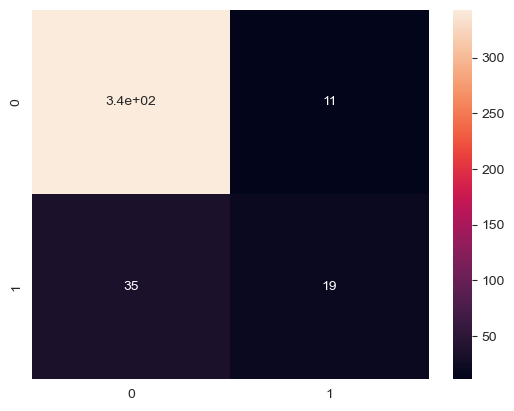

In [69]:
sns.heatmap(confusion_mat,annot=True)

#   

# MODEL BUILDING USING KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)   
model.fit(Xtrain,Ytrain)
y_pred = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Ytest,y_pred))

Accuracy Score: 0.875


In [136]:
err_rate=[]
for i in range (1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,Ytrain)
    pred_i=knn.predict(Xtest)
    err_rate.append(np.mean(pred_i!=Ytest))

Text(0, 0.5, 'Error Rate')

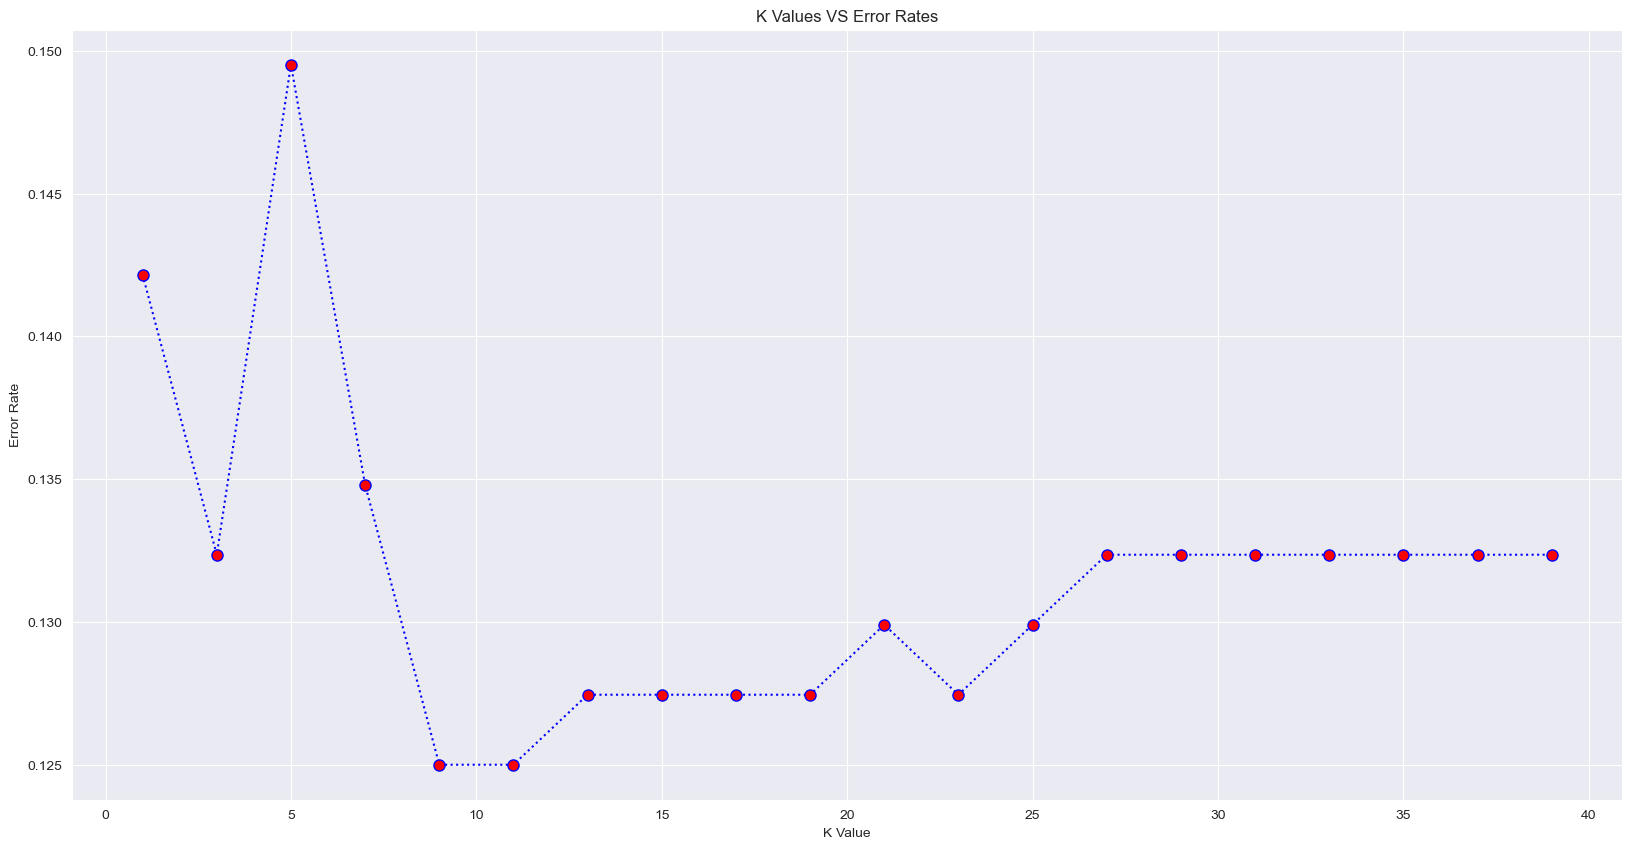

In [137]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40,2),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title('K Values VS Error Rates')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [138]:
print("F1 Score is =>",f1_score(Ytest,y_pred, average="weighted"))

F1 Score is => 0.830734990771903


In [139]:
print("Recall Score of the Model is =>",recall_score(Ytest,y_pred, average="weighted"))

Recall Score of the Model is => 0.875


In [140]:
print("Precision Score is =>",precision_score(Ytest,y_pred, average="weighted"))

Precision Score is => 0.856163163519772


In [242]:
confusion_mat = confusion_matrix(Ytest,y_pred)
print(confusion_mat)                                         

[[352   2]
 [ 49   5]]


<Axes: >

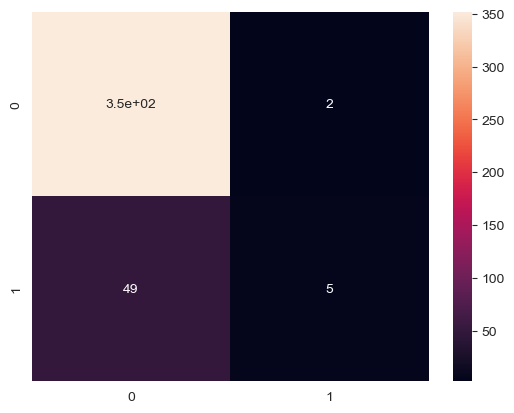

In [142]:
sns.heatmap(confusion_mat,annot=True)

# 

# MODEL BUILDING USING DECISION TREE

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [82]:
from sklearn.model_selection import GridSearchCV


dtree = DecisionTreeClassifier()

In [83]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["sqrt",None],
              "random_state":[0,42]}

In [84]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

### 2. Fetching the Best Parameters for DecisionTree Model

In [85]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n")
best_parameters

Best Parameters for DecisionTree Model is:



{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'random'}

### 3. Creating DecisionTree Model Using Best Parameters

In [86]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42,
                       splitter='random')

### 4. Computing Model Accuracy.

In [87]:
y_train_pred = dtree.predict(Xtrain)
y_test_pred = dtree.predict(Xtest)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(Ytrain,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(Ytest,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 87.49 %
Accuracy Score of Model on Testing Data  is => 87.75 %


### Inference:
The model has obtained 87 % accuracy on training Dataset and 88 % accuracy on testing dataset.
So therre's No underfitting or Overfitting in the model.
The model is having a kind of best fitting.

### 5. Model Evaluation using Different Metric Values.

In [88]:
print("F1 Score is =>",f1_score(Ytest,y_test_pred, average="weighted"))

F1 Score is => 0.8473088967490483


In [89]:
print("Recall Score of the Model is =>",recall_score(Ytest,y_test_pred, average="weighted"))

Recall Score of the Model is => 0.8774509803921569


In [90]:
print("Precision Score is =>",precision_score(Ytest,y_pred, average="weighted"))

Precision Score is => 0.8443043884220355


In [91]:
print("F1 Score of the Model is =>",f1_score(Ytest,y_test_pred, average="weighted"))
print("Recall Score of the Model is =>",recall_score(Ytest,y_test_pred, average="weighted"))
print("Precision Score of the Model is =>",precision_score(Ytest,y_test_pred, average="weighted"))

F1 Score of the Model is => 0.8473088967490483
Recall Score of the Model is => 0.8774509803921569
Precision Score of the Model is => 0.8529786914765907


### Inference:
We can observe that precision and F1 score are approximately same, it means that our model is achieving perfect balance between correctly identifying positive samples #(recall) and minimizing false positives (precision).
The high values for F1 score, recall score, and precision score, all of which are more than 0.8.

### 6. Finding Importance of Features in DecisionTreeClassifier.

In [109]:
imp_df = pd.DataFrame({"Feature Name":Xtrain.columns,
                       "Importance":dtree.feature_importances_})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'alcohol'),
  Text(0, 1, 'sulphates'),
  Text(0, 2, 'density'),
  Text(0, 3, 'citric acid'),
  Text(0, 4, 'residual sugar'),
  Text(0, 5, 'volatile acidity'),
  Text(0, 6, 'free sulfur dioxide'),
  Text(0, 7, 'fixed acidity'),
  Text(0, 8, 'total sulfur dioxide'),
  Text(0, 9, 'pH'),
  Text(0, 10, 'chlorides')])

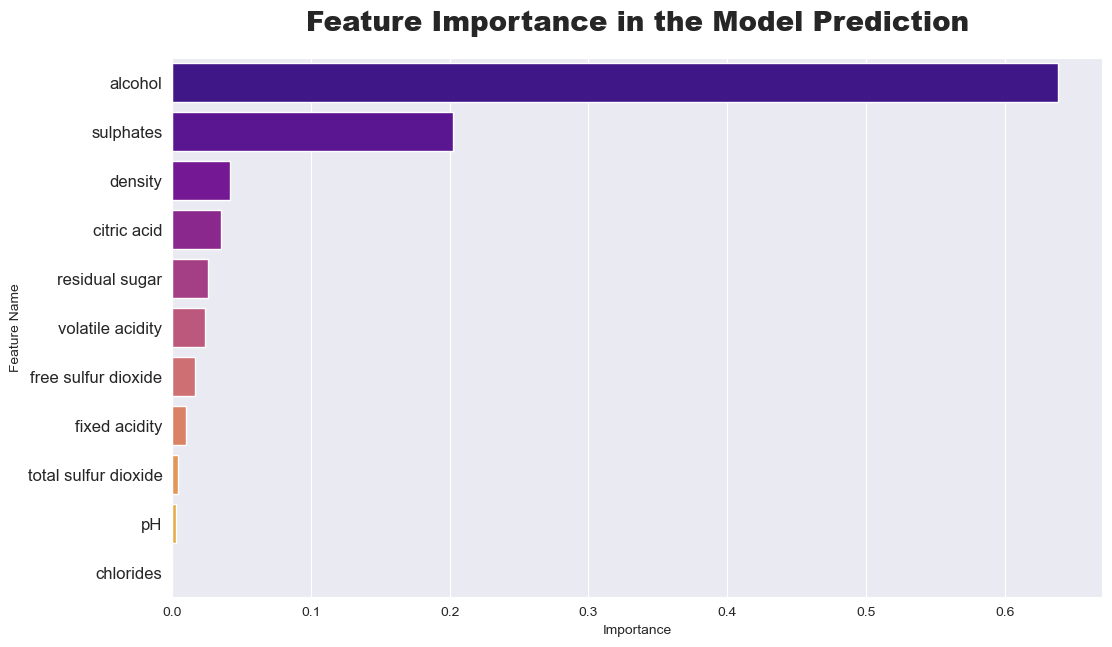

In [110]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)

### Inference:
The key factors that significantly influence the quality of wine are:-
Alcohol, Sulphates, and Density.
The minimal impact of features on the wine quality are:-
free sulfur dioxide, pH, and Residual Sugar

### 7. Model Evaluation using Confusion Matrix

Text(0.5, 38.72222222222221, 'Predicted Labels')

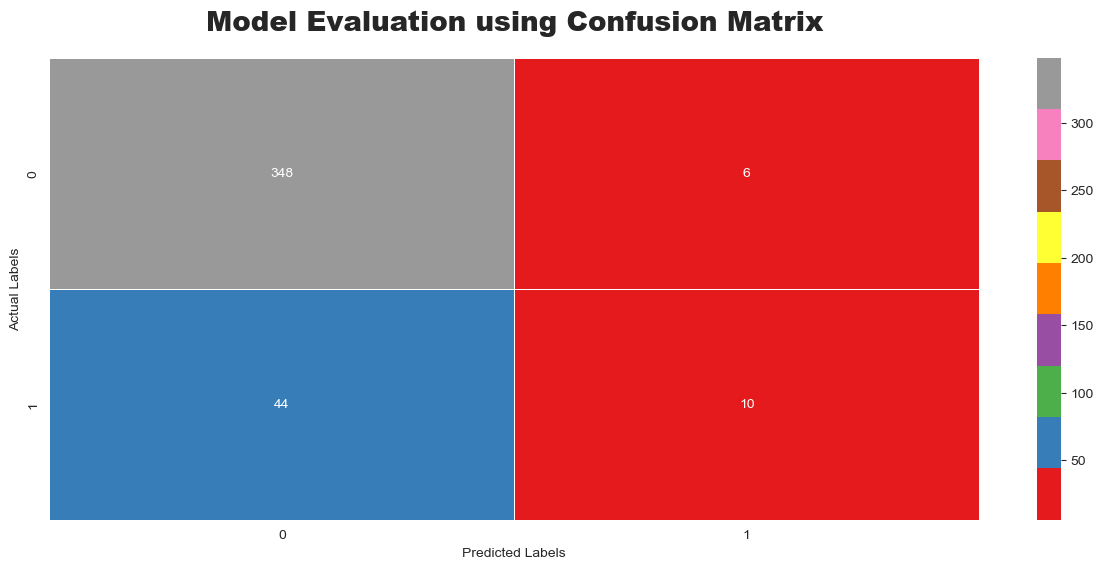

In [94]:
cm = confusion_matrix(Ytest,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")

In [ ]:
# THIS CONFUSION MATRIX IS A BIT DIFFERENT BECAUSE OF Y_PRED_VALUES

Inference:
* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

# 

# Model Creation using RandomForest

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [95]:
rfc = RandomForestClassifier()

In [96]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [97]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

### 2. Fetching the Best Parameters for RandomForest Model

In [102]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters


Best Parameters for RandomForest Model is:




{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 100}

### 3. Creating RandomForest Model Using Best Parameters

In [103]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(Xtrain,Ytrain)

RandomForestClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=3)

In [104]:
y_train_pred = rfc.predict(Xtrain)
y_test_pred  = rfc.predict(Xtest)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(Ytrain,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(Ytest,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 90.01 %
Accuracy Score of Model on Testing Data  is => 87.75 %


###  Inference:
The model has obtained 90 % accuracy on training Dataset and 88 % accuracy on testing dataset.
So there's No underfitting or Overfitting in the model.
The model is having a kind of best fitting.

### 5. Model Evaluation using Different Metric Values

In [105]:
print("F1 Score of the Model is =>",f1_score(Ytest,y_test_pred,average="weighted"))
print("Recall Score of the Model is =>",recall_score(Ytest,y_test_pred,average="weighted"))
print("Precision Score of the Model is =>",precision_score(Ytest,y_test_pred,average="weighted"))

F1 Score of the Model is => 0.8521055541033346
Recall Score of the Model is => 0.8774509803921569
Precision Score of the Model is => 0.8531382656155245


### Inference:
We can observe that precision and F1 score are approximately same, it means that our model is achieving perfect balance between correctly identifying positive samples and minimizing false positives.
The high values for F1 score, recall score, and precision score, all of which are more than 0.8

### 6. Finding Importance of Features in RandomForest Model

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'alcohol'),
  Text(0, 1, 'sulphates'),
  Text(0, 2, 'volatile acidity'),
  Text(0, 3, 'density'),
  Text(0, 4, 'chlorides'),
  Text(0, 5, 'citric acid'),
  Text(0, 6, 'total sulfur dioxide'),
  Text(0, 7, 'fixed acidity'),
  Text(0, 8, 'free sulfur dioxide'),
  Text(0, 9, 'pH'),
  Text(0, 10, 'residual sugar')])

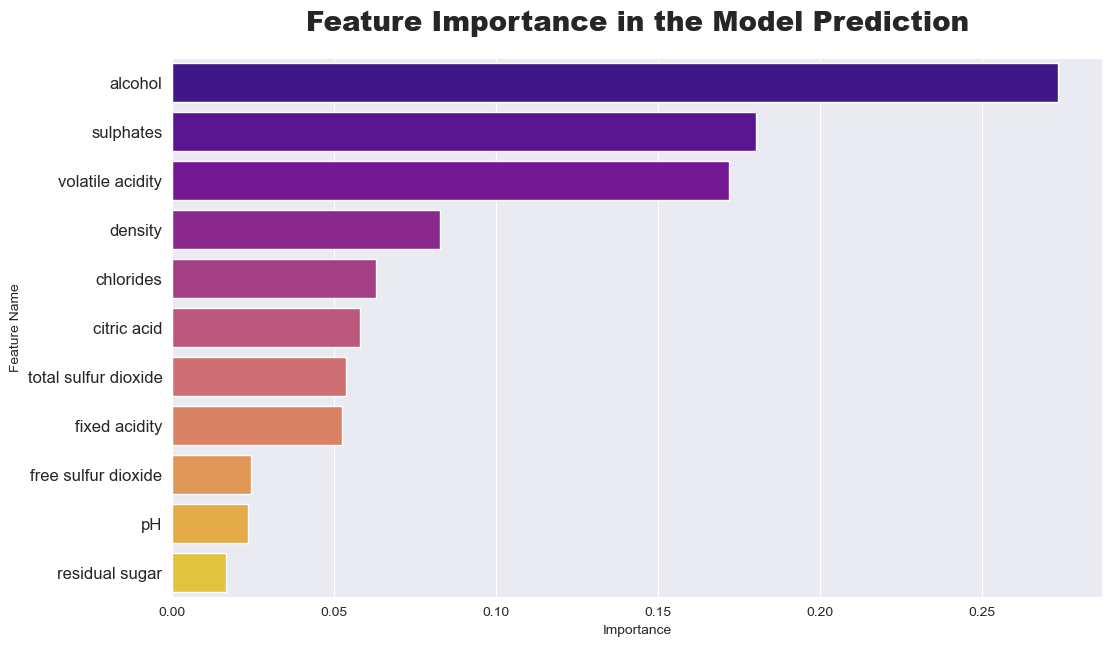

In [106]:
imp_df = pd.DataFrame({"Feature Name":Xtrain.columns,
                       "Importance":rfc.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)

### Inference:
The key factors that significantly influence the deactivation of customers banking facilities are:-
Alcohol, Sulphates, and Volatilee Acidity.
The minimal impact of features on the deactivation of customers' banking facilities are:-
Density, Free Sulfur Dioxide, and pH.

### 7. Model Evaluation using Confusion Matrix

Text(0.5, 38.72222222222221, 'Predicted Labels')

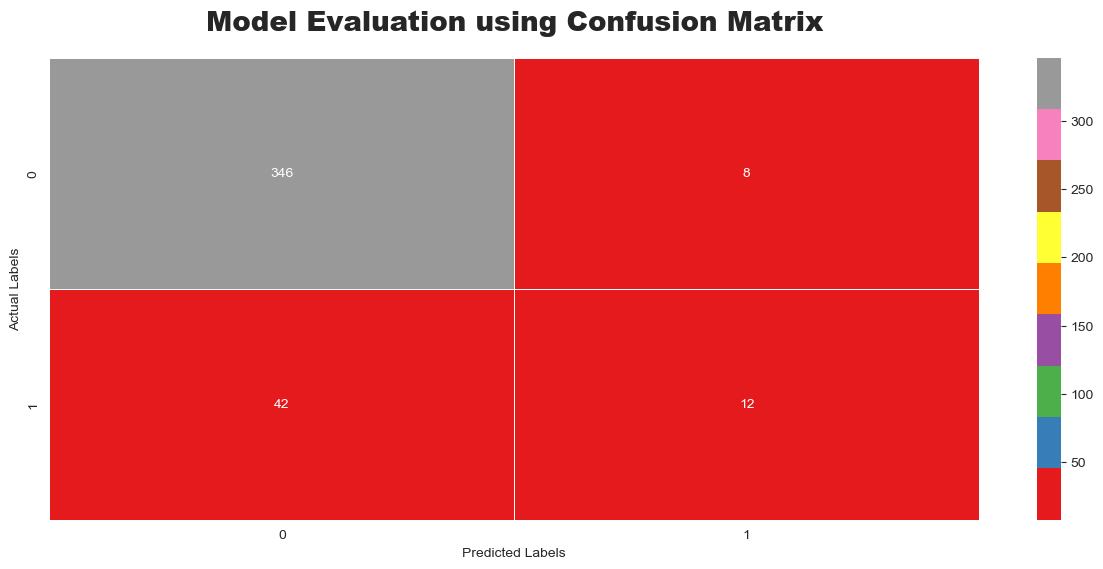

In [111]:
cm = confusion_matrix(Ytest,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")         

###  Inference:
* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome. 
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

# 

# CONCLUSIONS

### The key factors that significantly influence the wine quality are Alcohol, Sulphates and Volatile Acidity.

### The minimal impact of features on the wine quality are Free Sulfur Dioxide and pH

### High Training and Testing Accuracies: Both the model achieved a high accuracy score near to 90% on the training data, indicating a good fit to the training instances. Additionally, the model's accuracy score near to 88% on the testing data suggests its ability to generalize well to unseen instances.

### High F1 Score, Recall, and Precision: The model achieved high F1 score, recall, and precision values, all more than 0.8. This indicates that the model has a strong ability to correctly identify positive cases while minimizing false positives and maximizing true positives.


### Since our main concentration is based on accuracy score, Random Forest algorithm gives the highest accuracy.